## Вступление

Заказчик: Фонд "Shut Up and Take My Money"

Предистория: Инвесторы из фонда Shut Up and Take My Money хотят открыть заведение общепита в Москве, но не опредилились с типом заведения, местоположением, меню и ценами.

Задача: Подготовить исследование рынка Москвы, найти интересные особенности и рассказать о них в презентации.

## Изучение данных

In [1]:
#Импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
import math as mth
from scipy import stats as st
import plotly
from plotly import graph_objects as go
import folium
from folium import Marker, Map, Choropleth
from folium.plugins import MarkerCluster
import json

In [2]:
#Задаем параметры
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Открываем и изучаем датасет
data = pd.read_csv('/datasets/moscow_places.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [4]:
display(data.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,"1,550.00",NaN,0,4.00
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,"1,000.00",NaN,0,45.00
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.88,37.49,5.00,NaN,Цена чашки капучино:155–185 ₽,NaN,170.00,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.45,5.00,средние,Средний счёт:400–600 ₽,500.00,NaN,1,148.00


Сразу можно увидеть пропуски в столбцах price, avg_bill и.т.п. которые мы заполнить не сможем, т.к. они могут исказить данные для исследования

## Предобработка данных

In [5]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [6]:
#проверяем дупликаты во всех строках
data.duplicated().sum()

0

In [7]:
#проверяем дубликаты в названиях заведений
data['name'].duplicated().sum()

2792

In [8]:
#предполагаю что у нас есть одно и то же заведение, но записано по разному, поэтому приведём всё в нижний регистр
data['name'] = data['name'].str.lower()
data['name'] = data['name'].str.strip()
data['name'].duplicated().sum()

2894

In [9]:
len(data['name'].unique())

5512

In [10]:
data[['name', 'address']].duplicated().sum()

3

In [11]:
drows = data[data.duplicated(['name', 'address'])]
draws_names = drows['name']
drows_new = data.query('name in @draws_names')
display(drows_new)
len(drows_new)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1430,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.81,37.50,4.20,NaN,NaN,NaN,NaN,0,188.00
1511,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00–18:00",55.81,37.50,4.20,NaN,NaN,NaN,NaN,1,188.00
2211,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.81,37.64,4.40,NaN,NaN,NaN,NaN,0,150.00
2420,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00–00:00",55.81,37.64,4.40,NaN,NaN,NaN,NaN,1,150.00
3091,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.74,37.41,4.10,NaN,NaN,NaN,NaN,1,276.00
3109,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,55.74,37.41,4.10,NaN,NaN,NaN,NaN,0,276.00
6088,more poke,ресторан,"Москва, Духовской переулок, 19",Южный административный округ,"ежедневно, 10:00–22:00",55.70,37.61,4.40,NaN,NaN,NaN,NaN,1,NaN
7270,раковарня клешни и хвосты,"бар,паб","Москва, Братиславская улица, 12",Юго-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00–00:00",55.66,37.75,4.90,средние,Цена бокала пива:150–250 ₽,NaN,NaN,1,40.00
7937,хлеб да выпечка,кофейня,"Москва, Каширское шоссе, 61Г",Южный административный округ,"ежедневно, 09:00–22:00",55.62,37.71,4.50,NaN,NaN,NaN,NaN,1,NaN


9

Я так понимаю у нас есть неявные дубликаты в названиях, но мы от них избавились, приведя все названия к нижнему регистру, потому что дубликатов у нас 2894, уникальных значений 5512, в сумме получаем количество наших строк - 8406

Дубликатами могут являться те же названия заведений, но находиться они могут в разных местах

Дубликаты нашёл, 9 строк. выглядят странно, как ошибка при выгрузке, но что если один из дупликатов это доставка ?

In [12]:
#добавляем столбце с названием улицы
data['street'] = data['address'].apply(lambda x: x.split(',')[1])
print(data['street'].head())

0               улица Дыбенко
1               улица Дыбенко
2          Клязьминская улица
3     улица Маршала Федоренко
4         Правобережная улица
Name: street, dtype: object


In [13]:
#добавляем столбец для отображения круглосуточных и ежедневных заведений
data['is_24/7'] = data['hours'] == 'ежедневно, круглосуточно'

Предобработка выполнена, добавили нужные столбцы, привели названия к нижнему регистру, с остальными пропусками ничего сделать не сможем, либо проблема с выгрузкой данных, либо заведения не предоставили какую-либо информацию о себе, в том числе ради сохранения конкурентноспособности, в том смысле что заведения не дадут удалённо изучить своё меню и цены, но на мой вгляд такой подход не клиентоориентированный.

Как вариант у таких заведений есть собственный сайт на котором вся эта информация имеется и решили не дублировать её.

## Анализ данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
 14  street             8406 non-null   object 
 15  is_24/7            8406 non-null   bool   
dtypes: bool(1), float64(6), 

In [15]:
data_by_category = (data.groupby('category').agg(count=('name', 'count')).reset_index().sort_values('count', ascending=False))
data_by_category['percent'] = data_by_category['count'] / sum(data_by_category['count']) * 100
display(data_by_category)

,category,count,percent
3,кафе,2378,28.29
6,ресторан,2043,24.30
4,кофейня,1413,16.81
0,"бар,паб",765,9.10
5,пиццерия,633,7.53
2,быстрое питание,603,7.17
7,столовая,315,3.75
1,булочная,256,3.05


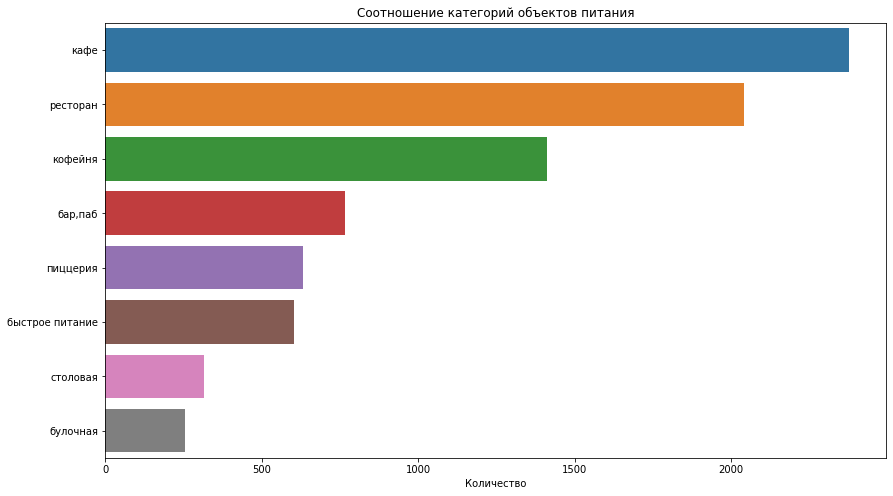

In [16]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='category',
                data=data_by_category)
ax.set_title('Соотношение категорий объектов питания')
ax.set_xlabel('Количество')
ax.set_ylabel('')
plt.show()

Всего в датасете 8406 заведений и по количеству расположились в таком порядке, на первом месте кафе, далее идут рестораны и кофейни

In [17]:
data_by_seats = (data.groupby('category').agg(median=('seats', 'median')).reset_index().sort_values('median', ascending=False))
display(data_by_seats)

,category,median
6,ресторан,86.00
0,"бар,паб",82.50
4,кофейня,80.00
7,столовая,75.50
2,быстрое питание,65.00
3,кафе,60.00
5,пиццерия,55.00
1,булочная,50.00


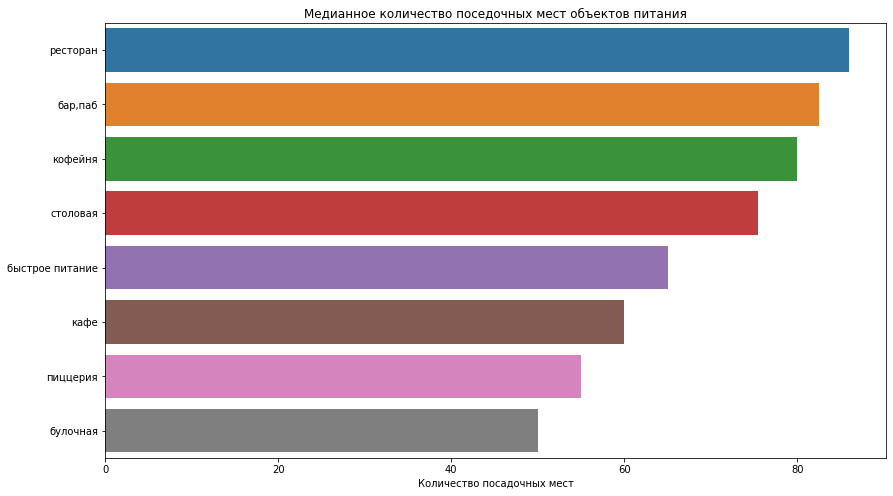

In [18]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='median', y='category',
                data=data_by_seats)
ax.set_title('Медианное количество поседочных мест объектов питания')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('')
plt.show()

В среднем по количеству посадочных мест в заведениях лидируют ретсораны, далее за ними расположились бары/пабы и кофейни.

In [19]:
data_chain = data.groupby('chain').agg(count=('name', 'count')).reset_index().sort_values(by='count', ascending=False)
#0 - не сетевое, 1 - сетевое
display(data_chain)

,chain,count
0,0,5201
1,1,3205


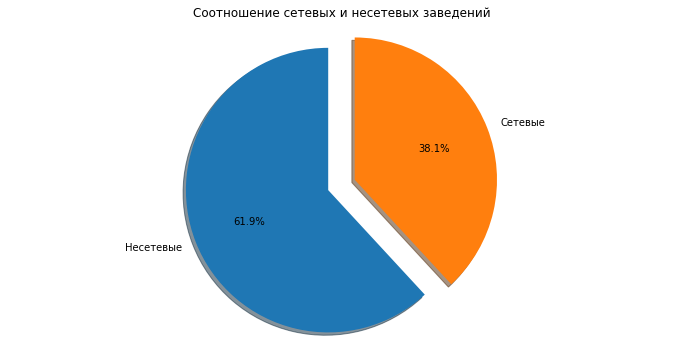

In [20]:
name = ['Несетевые', 'Сетевые']
labels = name
sizes = data_chain['count']

fig1, ax1 = plt.subplots(figsize = (12, 6))
explode = (0.2, 0)
ax1.pie(sizes, labels=name, autopct='%1.1f%%',
        shadow=True, startangle=90,
       explode=explode)
ax1.axis('equal')
ax1.set_title('Соотношение сетевых и несетевых заведений')

plt.show()

Чуть больше 1/3 трети заведений являются сетевыми.

,category,count
3,кафе,779
6,ресторан,730
4,кофейня,720
5,пиццерия,330
2,быстрое питание,232
0,"бар,паб",169
1,булочная,157
7,столовая,88


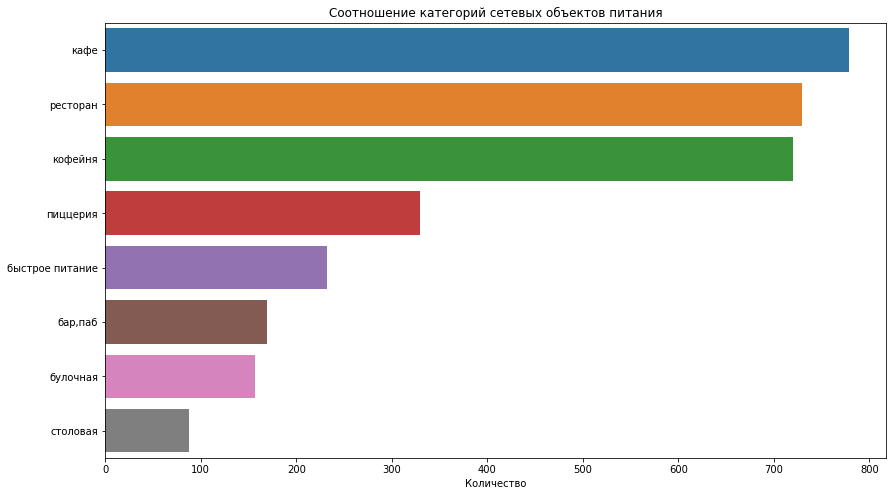

In [21]:
data_one = (data.query('chain == 1')
.groupby('category')
.agg(count=('name', 'count'))
.reset_index()
.sort_values('count', ascending=False))
display(data_one)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='category',
                data=data_one)
ax.set_title('Соотношение категорий сетевых объектов питания')
ax.set_xlabel('Количество')
ax.set_ylabel('')
plt.show()

На данном графике мы видим количество сетевых заведений в разрезе категорий.

Топ-3 категорий заведений остаются кафе, рестораны и кофейни

In [22]:
data_top = data.groupby('name').agg(count=('name', 'count')).reset_index().sort_values(by='count', ascending=False)
display(data_top.head(15))

,name,count
2825,кафе,189
5418,шоколадница,120
2532,домино'с пицца,77
2500,додо пицца,74
1137,one price coffee,72
5491,яндекс лавка,69
413,cofix,65
1263,prime,50
4993,хинкальная,44
5319,шаурма,43


Нашли топ-15 заведений, но меня смущает первая позиция, возможно это разные заведения, но с одним названием "Кафе", аналогичная ситуация с хинкальной, шаурма и ресторан, возможно названия заведений так же повредились при выгрузке и остались обобщены.

<div class="alert alert-block alert-warning">

**Комментарий ревьювера (что можно улучшить)**
    
Простые названия обычно распространены, как правило это маленькие, несетевые заведения.
</div>

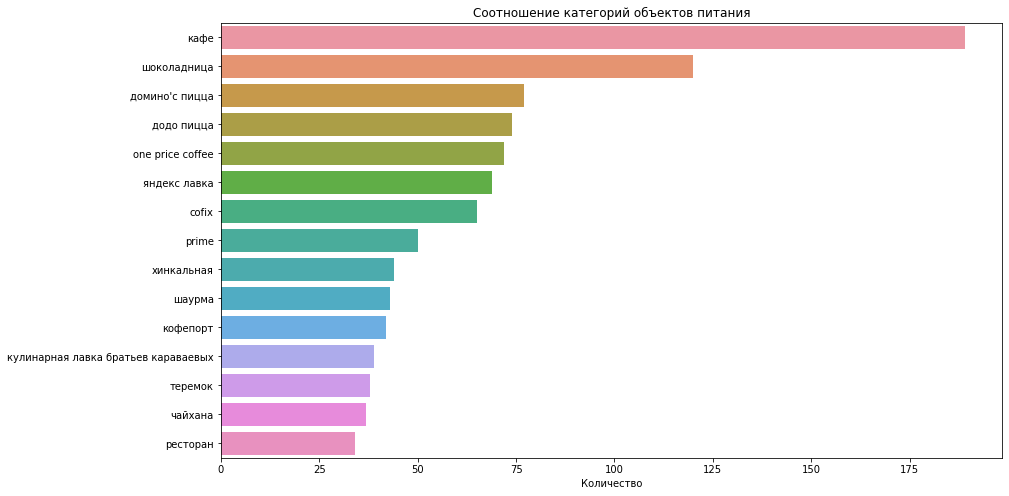

In [23]:
data_top_two = data_top.query('count >= 34')
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='name',
                data=data_top_two)
ax.set_title('Соотношение категорий объектов питания')
ax.set_xlabel('Количество')
ax.set_ylabel('')
plt.show()

In [24]:
data_top_wo = data_top.query('name != "кафе" and name != "хинкальная" and name != "шаурма" and name != "ресторан" and name != "столовая"')
display(data_top_wo.head(15))

,name,count
5418,шоколадница,120
2532,домино'с пицца,77
2500,додо пицца,74
1137,one price coffee,72
5491,яндекс лавка,69
413,cofix,65
1263,prime,50
3178,кофепорт,42
3236,кулинарная лавка братьев караваевых,39
4700,теремок,38


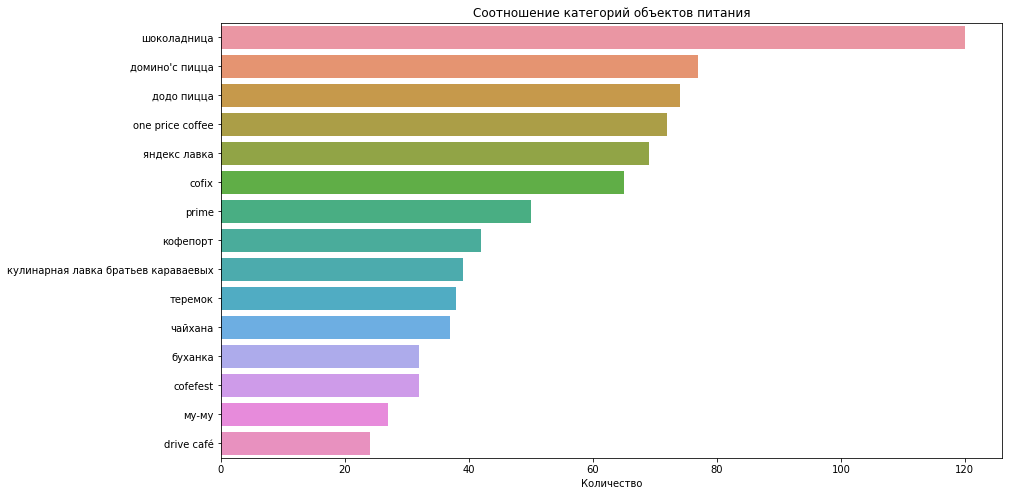

In [25]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='name',
                data=data_top_wo.query('count >= 24'))
ax.set_title('Соотношение категорий объектов питания')
ax.set_xlabel('Количество')
ax.set_ylabel('')
plt.show()

А вот так у нас будет выглядеть топ-15 заведений без обобщенных названий.

Слышал про такие заведения как чайхана, домино'с пицца, Яндекс лавка, но делал заказы только в Додо пицце.

In [26]:
data_region = data.groupby('district').agg(count=('name', 'count')).reset_index().sort_values('count', ascending=False)
display(data_region)

,district,count
5,Центральный административный округ,2242
2,Северный административный округ,900
8,Южный административный округ,892
3,Северо-Восточный административный округ,891
1,Западный административный округ,851
0,Восточный административный округ,798
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,709
4,Северо-Западный административный округ,409


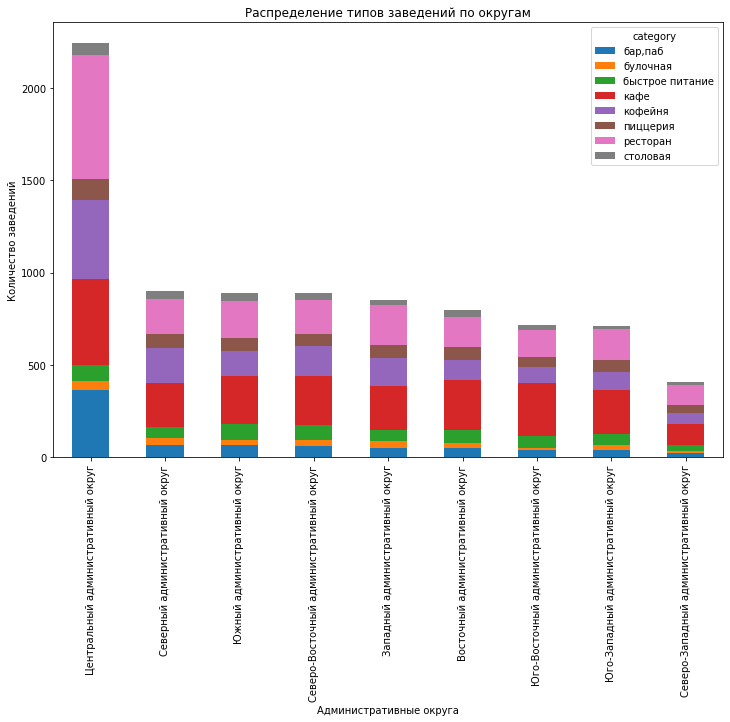

In [27]:
check = data.pivot_table(
index='category',
columns='district',
values='name',
aggfunc='count')
sorting = check.sum().sort_values(ascending=False)
check[sorting.index].T.plot.bar(stacked=True, figsize=(12,8))
plt.title('Распределение типов заведений по округам')
plt.ylabel('Количество заведений')
plt.xlabel('Административные округа')
plt.show()

Так у нас распределены категории заведений по административным округам.

В каждом разрезе лидирует Центральный административный округ.

Административные округа включают в себя районы, которые образуются с учётом исторических, географических, градостроительных особенностей соответствующих территорий, численности населения, социально-экономических характеристик, расположения транспортных коммуникаций, наличия инженерной инфраструктуры и других особенностей территории.

In [28]:
data_by_rating = data.groupby('category', as_index=False).agg(median=('rating', 'median')).reset_index().sort_values('median', ascending=False)
display(data_by_rating)

,index,category,median
0,0,"бар,паб",4.40
1,1,булочная,4.30
4,4,кофейня,4.30
5,5,пиццерия,4.30
6,6,ресторан,4.30
7,7,столовая,4.30
2,2,быстрое питание,4.20
3,3,кафе,4.20


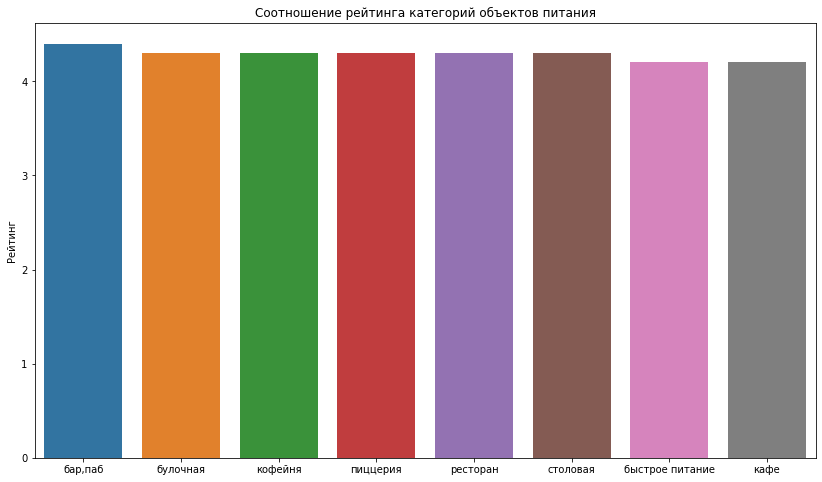

In [29]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='category', y='median',
                data=data_by_rating)
ax.set_title('Соотношение рейтинга категорий объектов питания')
ax.set_xlabel('')
ax.set_ylabel('Рейтинг')
plt.show()

In [30]:
data_by_rating_new = data.groupby('category', as_index=False).agg(mean=('rating', 'mean')).reset_index().sort_values('mean', ascending=False)
display(data_by_rating_new)

,index,category,mean
0,0,"бар,паб",4.39
5,5,пиццерия,4.30
6,6,ресторан,4.29
4,4,кофейня,4.28
1,1,булочная,4.27
7,7,столовая,4.21
3,3,кафе,4.12
2,2,быстрое питание,4.05


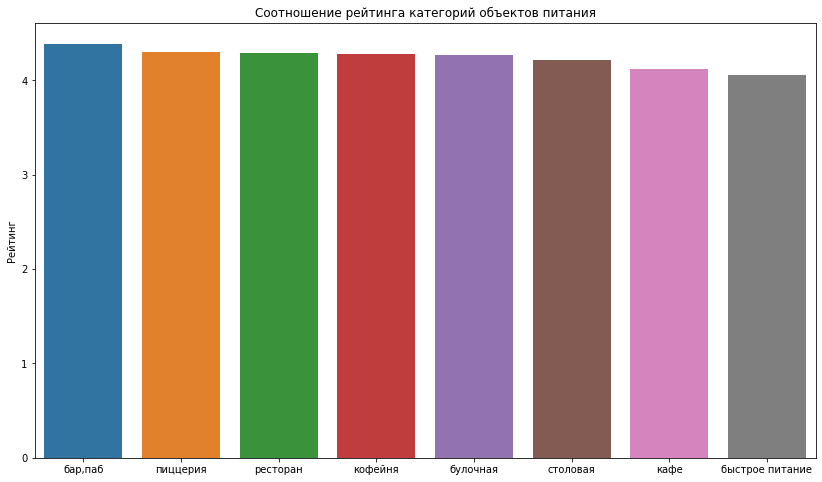

In [31]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='category', y='mean',
                data=data_by_rating_new)
ax.set_title('Соотношение рейтинга категорий объектов питания')
ax.set_xlabel('')
ax.set_ylabel('Рейтинг')
plt.show()

В средних рейтингах по категориям и округам различий почти нету.

Предполагаю, что самый высокий рейтинг в центре Москвы обусловлен туристическим фактором и фактором ожидания:

Туристический фактор - ранее не бывавший в центре Москвы турист точно захочет покушать, откроет карту и первое что увидит, это рейтинг заведения, первое впечатление очень важно чтобы даже в теории зацепить пользователя и повысить его шансы посетить заведение и, в идеале, совершить покупку.

Фактор ожидания - соответствие заведения и его рейтинга, он складывается от многих других подфакторов, например работы персонала, ожидания приготовления блюд, их вида, цена меню, а особенно выживание в жестких условиях конкуренции.

In [34]:
data_by_street = data.groupby('street', as_index=False)['name'].agg('count').sort_values('name', ascending=False)
display(data_by_street.head(15))

,street,name
1090,проспект Мира,184
773,Профсоюзная улица,122
1087,проспект Вернадского,108
525,Ленинский проспект,107
523,Ленинградский проспект,95
373,Дмитровское шоссе,88
455,Каширское шоссе,77
298,Варшавское шоссе,76
524,Ленинградское шоссе,70
550,МКАД,65


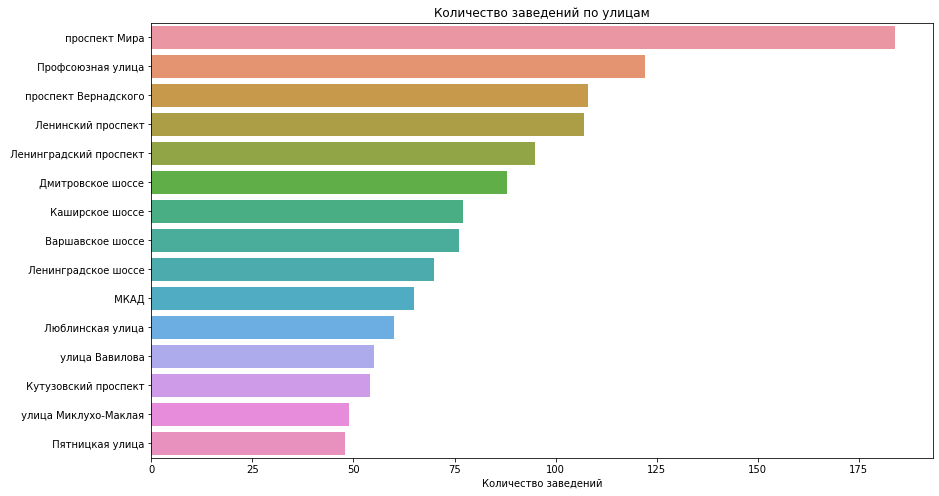

In [35]:
data_by_street = data_by_street.query('name >= 48')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='street',
                data=data_by_street)
ax.set_title('Количество заведений по улицам')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('')
plt.show()

Больше всего заведений открыто на проспекте Мира, далее идёт Профсоюзная улица и проспект Вернадского.

Наибольшее число заведений в Цетральном административном округе, скорее всего это связано с туристическими местами и местами с высоким трафиком людей.

In [36]:
data_by_streett = data.groupby('street', as_index=False)['name'].agg('count').sort_values('name', ascending=True)

data_by_streett = data_by_streett.query('name == 1')

In [37]:
data_by_street_test = data_by_streett['street']
by_street = data.query('street in @data_by_street_test')
display(by_street.head(5))
display(len(by_street))

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
15,дом обеда,столовая,"Москва, улица Бусиновская Горка, 2",Северный административный округ,пн-пт 08:30–18:30; сб 10:00–20:00,55.89,37.49,4.10,средние,Средний счёт:300–500 ₽,400.00,NaN,0,180.00,улица Бусиновская Горка,False
21,7/12,кафе,"Москва, Прибрежный проезд, 7",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.46,4.50,NaN,NaN,NaN,NaN,0,NaN,Прибрежный проезд,False
25,в парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.88,37.46,4.30,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
58,coffeekaldi's,кофейня,"Москва, Угличская улица, 13, стр. 8",Северо-Восточный административный округ,"ежедневно, 09:00–22:00",55.90,37.57,4.10,средние,Средний счёт:500–800 ₽,650.00,NaN,1,NaN,Угличская улица,False
60,чебуречная история,кофейня,"Москва, ландшафтный заказник Лианозовский",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.90,37.57,4.90,NaN,NaN,NaN,NaN,1,NaN,ландшафтный заказник Лианозовский,False


458

In [38]:
by_street_new = by_street.groupby('category', as_index=False)['name'].agg('count').sort_values('name', ascending=False)
display(by_street_new)

,category,name
3,кафе,160
6,ресторан,93
4,кофейня,84
0,"бар,паб",39
7,столовая,36
2,быстрое питание,23
5,пиццерия,15
1,булочная,8


In [39]:
by_street_new = by_street.groupby('name').agg(count=('name', 'count')).reset_index().sort_values(by='count', ascending=False)
display(by_street_new)

,name,count
188,кафе,19
402,яндекс лавка,6
24,cofefest,6
390,шаурма,3
256,монастырская трапеза,3
...,...,...
143,время чудес,1
142,восточная кухня,1
141,вкусное,1
140,вкус кофе,1


Часть заведений находится в "спальных" райоах, либо недалеко расположенные от них, так же присутствуют заведения рядом с прогулочными местами - парками.

6 заведений Яндекс лавки скорее всего склады, которые были открыты для большего охвата районов, удобной логистики и быстрой доставки.

Заметил, что часть заведений расположены в переулках - чаще всего короткая улица, которая соединяет две большие улицы между собой.

Скорее всего множество заведенй расположены в центре из-за высокого трафика людей, например рядом с учебными заведениями - университетами, так же присутствует исторический фактор, много туристических мест и путей расположено рядом, в центре МОсквы могут располагаться бизнес центры, которые генерируют трафик посетителей.

In [41]:
data_median_bill = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median').sort_values('middle_avg_bill', ascending=False)
display(data_median_bill)

,district,middle_avg_bill
1,Западный административный округ,"1,000.00"
5,Центральный административный округ,"1,000.00"
4,Северо-Западный административный округ,700.00
2,Северный административный округ,650.00
7,Юго-Западный административный округ,600.00
0,Восточный административный округ,575.00
3,Северо-Восточный административный округ,500.00
8,Южный административный округ,500.00
6,Юго-Восточный административный округ,450.00


Выводы:

    Топ-3 категорий заведений по количеству заведений и количеству посадочных мест: кафе, кофейни и рестораны.
    Самым большим по количеству заведений является Центральный административный округ.
    В ретингах заведений и рейтингах по округам разницы практически нет.
    Наибольший средний чек в Западном и Центральном административных округах.

## Исследование: открытие кофейни

Задача: проанализировать кофейни в датасете и дать рекомендации инвесторам фонда Shut Up and Take My Money которые решили открыть такую же крутую кофейню как "Central Perk".

In [43]:
#Вывел общее количество заведений, в презентации сделал акцент на то, что кофейня занимает лишь 3 место среди всех заведений
data_coffee = data.groupby('category', as_index=False)['name'].agg('count').sort_values('name', ascending=False)
display(data_coffee)

,category,name
3,кафе,2378
6,ресторан,2043
4,кофейня,1413
0,"бар,паб",765
5,пиццерия,633
2,быстрое питание,603
7,столовая,315
1,булочная,256


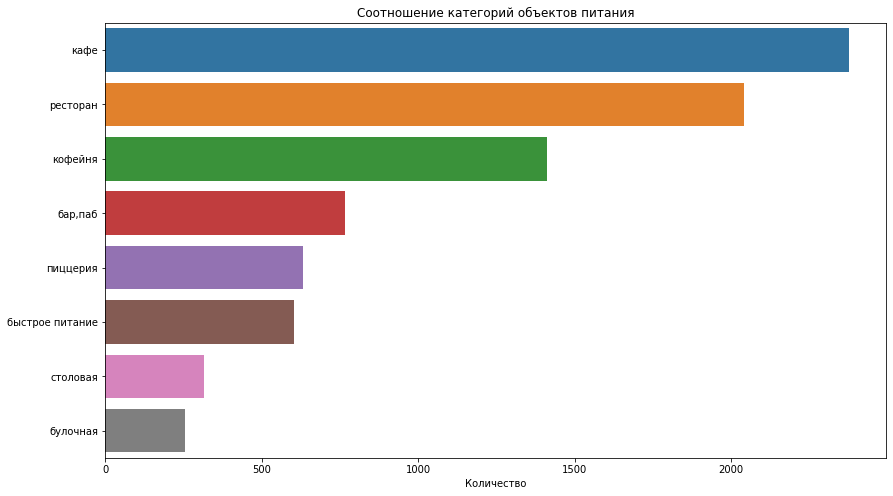

In [44]:
#Строим график соотношения категорий объектов питания
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='category',
                data=data_coffee)
ax.set_title('Соотношение категорий объектов питания')
ax.set_xlabel('Количество')
ax.set_ylabel('')
plt.show()

Снова выводим количество заведений по всем категориям и видим что кофейни занимают лишь 3 место среди всех категорий по количеству заведений, конкуренцию никто не отменял, но в нашей категории она будет меньше из-за количества кофеен.

In [45]:
#Далее иллюстрирую распределение по административным округам
data_coffee_district = data.query('category == "кофейня"').groupby('district', as_index=False)['name'].agg('count').sort_values('name', ascending=False)
display(data_coffee_district)

,district,name
5,Центральный административный округ,428
2,Северный административный округ,193
3,Северо-Восточный административный округ,159
1,Западный административный округ,150
8,Южный административный округ,131
0,Восточный административный округ,105
7,Юго-Западный административный округ,96
6,Юго-Восточный административный округ,89
4,Северо-Западный административный округ,62


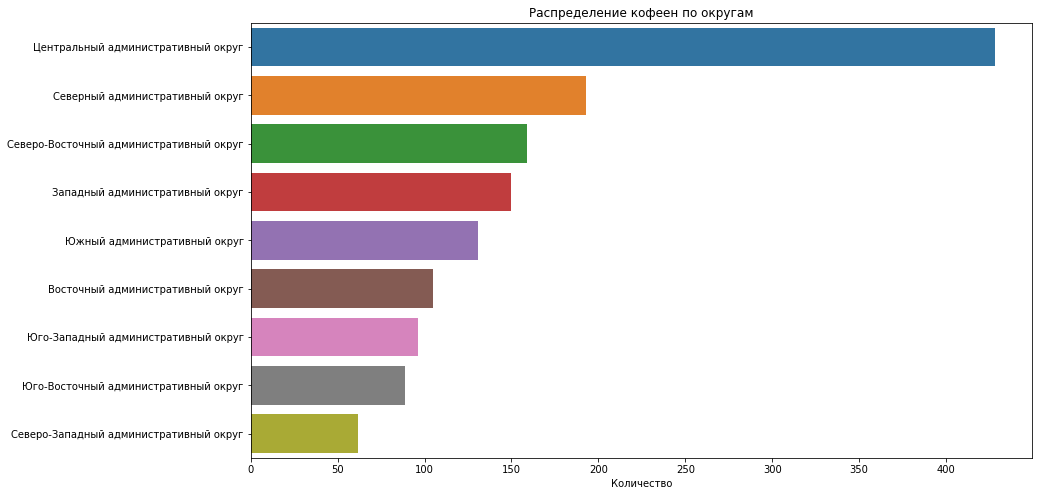

In [46]:
#Строим график распределения кофеен по округам
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='name', y='district',
                data=data_coffee_district)
ax.set_title('Распределение кофеен по округам')
ax.set_xlabel('Количество')
ax.set_ylabel('')
plt.show()

Боольше всего кофеен в ЦАО - центр города, туристические маршруты, университеты, бизнес-центры, всё это генерирует большой трафик людей.

In [47]:
#Сортируем кофейни по столбцу 24/7 который отвечает за круглосуточную работу заведения.
data_coffee_alltime = data.query('category == "кофейня"').groupby('is_24/7', as_index=False)['name'].agg('count')

display(data_coffee_alltime)

labels = ['Не работают круглосуточно и ежедневно','Работают круглосуточно и ежедневно']

,is_24/7,name
0,False,1354
1,True,59


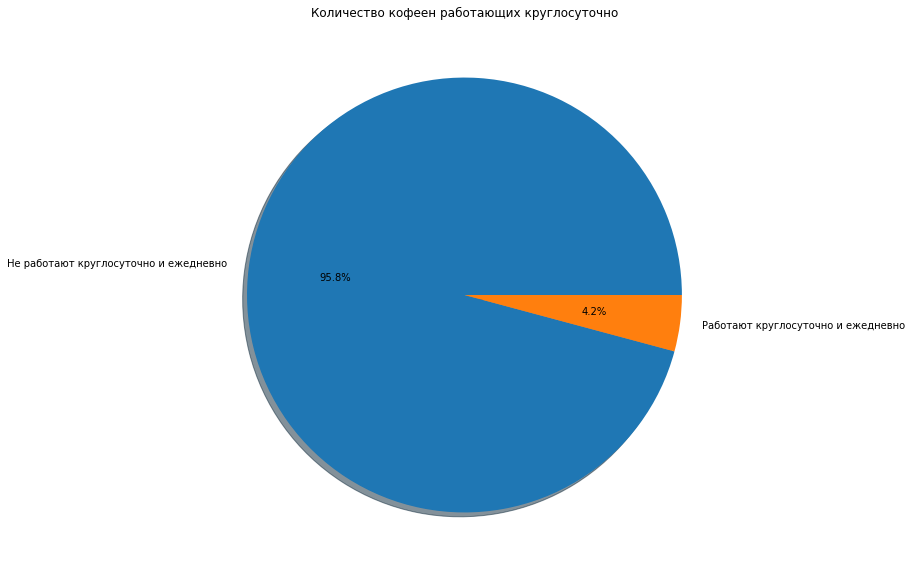

In [48]:
#Строим график количества кофеен работающих и не работающих круглосуточно
plt.figure(figsize=(15,10))
plt.pie(data_coffee_alltime['name'],
       labels=labels,
       autopct='%1.1f%%',
       shadow=True)
plt.title('Количество кофеен работающих круглосуточно')
plt.show()

лишь 4.2% кофеен работает круглосуточно и ежедневно, тут есть плюсы и минусы

Плюсы: мы всегда открыты и готовы продавать кофе всем посетителям, тем более количество круглосуточных и ежедневных кофеен очень маленькое.

Минусы: ночью низкий трафик людей, но есть такая прослойка людей которые любят ночную жизнь, вопрос: будет ли прибыль превышать затраты на ночную работу ? Тут нужно дополнительно исследовать генерацию прибыли в ночные часы чтобы дать точный ответ.

In [49]:
#Смотрим рейтинг по медиане
data_coffee_rating = data.query('category == "кофейня"').groupby('district', as_index=False)['rating'].agg('median')
display(data_coffee_rating)
display(data['rating'].describe())

,district,rating
0,Восточный административный округ,4.30
1,Западный административный округ,4.20
2,Северный административный округ,4.30
3,Северо-Восточный административный округ,4.30
4,Северо-Западный административный округ,4.30
5,Центральный административный округ,4.30
6,Юго-Восточный административный округ,4.30
7,Юго-Западный административный округ,4.30
8,Южный административный округ,4.30


count   8,406.00
mean        4.23
std         0.47
min         1.00
25%         4.10
50%         4.30
75%         4.40
max         5.00
Name: rating, dtype: float64

In [50]:
#Строим график рейтинга кофеен по округам по медиане
data_coffee_rating = (data.query('category == "кофейня"')
                      .groupby('district', as_index=False)
                      .agg(mean=('rating', 'mean'))
                      .reset_index()
                      .sort_values('mean', ascending=False))
display(data_coffee_rating)

,index,district,mean
5,5,Центральный административный округ,4.34
4,4,Северо-Западный административный округ,4.33
2,2,Северный административный округ,4.29
7,7,Юго-Западный административный округ,4.28
0,0,Восточный административный округ,4.28
8,8,Южный административный округ,4.23
6,6,Юго-Восточный административный округ,4.23
3,3,Северо-Восточный административный округ,4.22
1,1,Западный административный округ,4.20


Медианный и средний рейтинги почти ничем не отличаются, как минимум можно поставить планку выйти на рейтинг не ниже медианного после открытия кофейни, думаю это можно будет считать за успех и стремиться к рейтингу 5.0

In [51]:
#Смотрим на цену чашки каппучино по медиане
data_coffee_price = (data.query('category == "кофейня"').groupby('district', as_index=False)['middle_coffee_cup'].agg('median')
.sort_values('middle_coffee_cup', ascending=False))
display(data_coffee_price)
data_coffee_price.describe()

,district,middle_coffee_cup
7,Юго-Западный административный округ,198.00
5,Центральный административный округ,190.00
1,Западный административный округ,189.00
4,Северо-Западный административный округ,165.00
3,Северо-Восточный административный округ,162.50
2,Северный административный округ,159.00
8,Южный административный округ,150.00
6,Юго-Восточный административный округ,147.50
0,Восточный административный округ,135.00


,middle_coffee_cup
count,9.00
mean,166.22
std,21.65
min,135.00
25%,150.00
50%,162.50
75%,189.00
max,198.00


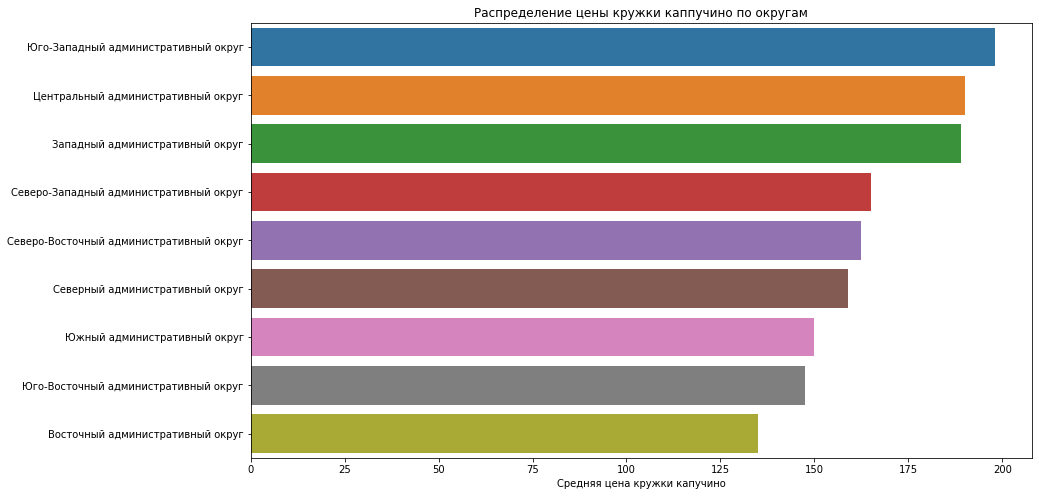

In [52]:
#Строим график распределения цены кружки каппучино по округам
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='middle_coffee_cup', y='district',
                data=data_coffee_price)
ax.set_title('Распределение цены кружки каппучино по округам')
ax.set_xlabel('Средняя цена кружки капучино')
ax.set_ylabel('')
plt.show()

In [53]:
#Смотрим на среднюю цену чашки каппучино
data_coffee_price = (data.query('category == "кофейня"')
                      .groupby('district', as_index=False)
                      .agg(mean=('middle_coffee_cup', 'mean'))
                      .reset_index()
                      .sort_values('mean', ascending=False))
display(data_coffee_price)
data_coffee_price.describe()

,index,district,mean
1,1,Западный административный округ,189.94
5,5,Центральный административный округ,187.52
7,7,Юго-Западный административный округ,184.18
0,0,Восточный административный округ,174.02
2,2,Северный административный округ,165.79
4,4,Северо-Западный административный округ,165.52
3,3,Северо-Восточный административный округ,165.33
8,8,Южный административный округ,158.49
6,6,Юго-Восточный административный округ,151.09


,index,mean
count,9.00,9.00
mean,4.00,171.32
std,2.74,13.49
min,0.00,151.09
25%,2.00,165.33
50%,4.00,165.79
75%,6.00,184.18
max,8.00,189.94


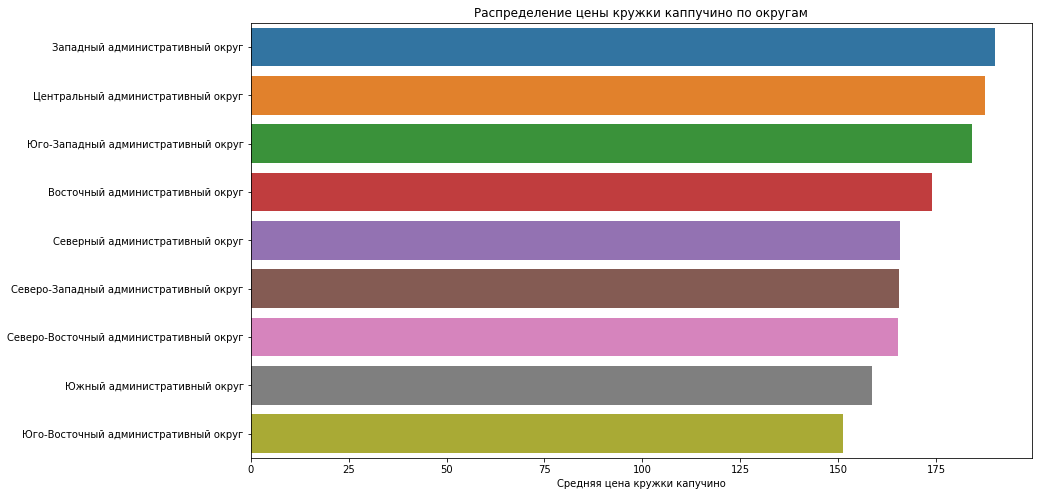

In [54]:
#Строим график распределения цены кружки каппучино по округам
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='mean', y='district',
                data=data_coffee_price)
ax.set_title('Распределение цены кружки каппучино по округам')
ax.set_xlabel('Средняя цена кружки капучино')
ax.set_ylabel('')
plt.show()

Самые высокие цены на кружку каппучино в ЗАО и ЦАО.

In [55]:
#Смотрим на средний чек по округам
data_coffee_avgbill = (data.query('category == "кофейня"').groupby('district', as_index=False)['middle_avg_bill'].agg('median')
.sort_values('middle_avg_bill', ascending=False))
display(data_coffee_avgbill)
display(data_coffee_avgbill['middle_avg_bill'].describe())

,district,middle_avg_bill
1,Западный административный округ,600.00
5,Центральный административный округ,500.00
0,Восточный административный округ,400.00
8,Южный административный округ,387.50
7,Юго-Западный административный округ,375.00
2,Северный административный округ,325.00
3,Северо-Восточный административный округ,325.00
4,Северо-Западный административный округ,325.00
6,Юго-Восточный административный округ,250.00


count     9.00
mean    387.50
std     105.33
min     250.00
25%     325.00
50%     375.00
75%     400.00
max     600.00
Name: middle_avg_bill, dtype: float64

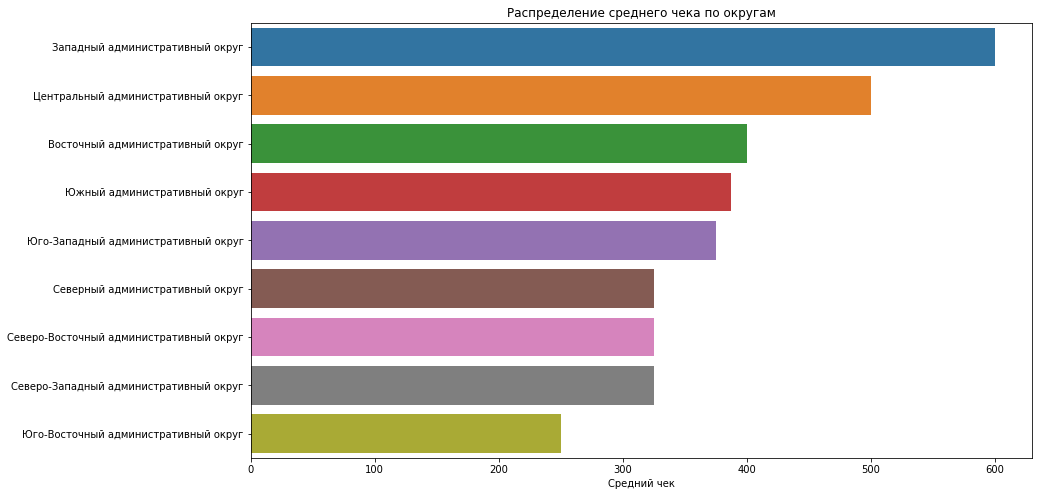

In [56]:
#Строим график распределения среднего чека по округам
plt.figure(figsize=(14,8))
ax = sns.barplot(x='middle_avg_bill', y='district',
                data=data_coffee_avgbill)
ax.set_title('Распределение среднего чека по округам')
ax.set_xlabel('Средний чек')
ax.set_ylabel('')
plt.show()

In [57]:
#Строим таблицу медианного среднего чека
data_coffee_avgbill = (data.query('category == "кофейня"')
                      .groupby('district', as_index=False)
                      .agg(mean=('middle_avg_bill', 'mean'))
                      .reset_index()
                      .sort_values('mean', ascending=False))
display(data_coffee_avgbill)

,index,district,mean
5,5,Центральный административный округ,794.76
1,1,Западный административный округ,694.44
8,8,Южный административный округ,504.78
2,2,Северный административный округ,495.74
0,0,Восточный административный округ,486.11
4,4,Северо-Западный административный округ,440.64
3,3,Северо-Восточный административный округ,433.16
7,7,Юго-Западный административный округ,381.82
6,6,Юго-Восточный административный округ,263.00


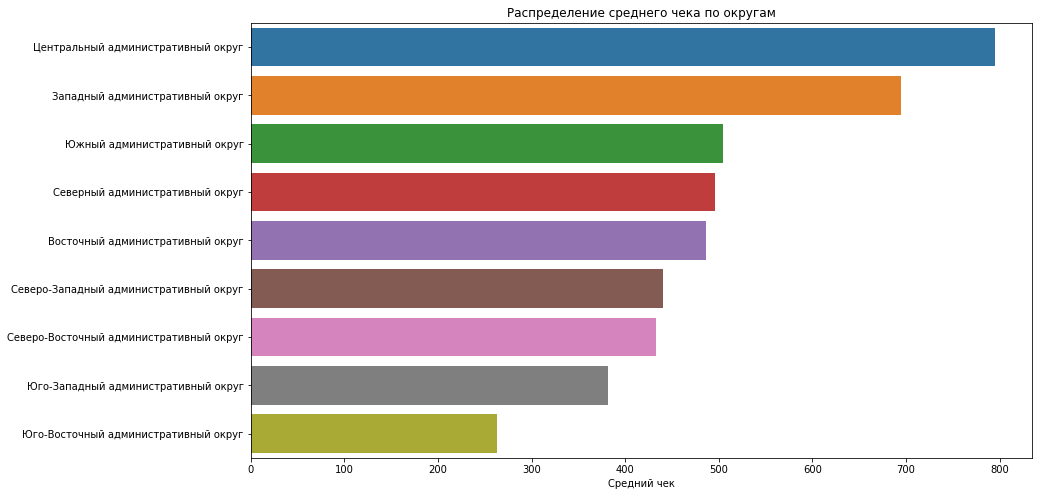

In [58]:
#Строим график медианного среднего чека
plt.figure(figsize=(14,8))
ax = sns.barplot(x='mean', y='district',
                data=data_coffee_avgbill)
ax.set_title('Распределение среднего чека по округам')
ax.set_xlabel('Средний чек')
ax.set_ylabel('')
plt.show()

С ощутимым отрывом по среднему чеку лидируют ЦАО и ЗАО

In [59]:
#Смотрим распределение посадочных мест по округам
data_coffee_seats = (data.query('category == "кофейня"')
                      .groupby('district', as_index=False)
                      .agg(mean=('seats', 'mean'))
                      .reset_index()
                      .sort_values('mean', ascending=False))
display(data_coffee_seats)

,index,district,mean
1,1,Западный административный округ,153.33
8,8,Южный административный округ,124.97
2,2,Северный административный округ,117.28
5,5,Центральный административный округ,113.15
0,0,Восточный административный округ,97.44
3,3,Северо-Восточный административный округ,92.13
4,4,Северо-Западный административный округ,87.35
7,7,Юго-Западный административный округ,86.61
6,6,Юго-Восточный административный округ,70.92


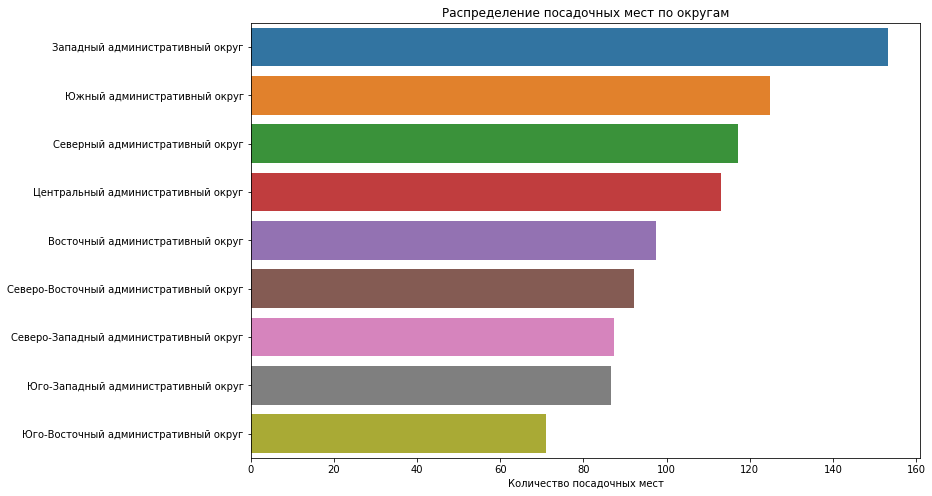

In [60]:
#Строим график распределения посадочных мест по округам
plt.figure(figsize=(12,8))
ax = sns.barplot(x='mean', y='district',
                data=data_coffee_seats)
ax.set_title('Распределение посадочных мест по округам')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('')
plt.show()

Больше всего посадочных мест в ЗАО.

In [61]:
#Смотрим распределение кофеен по категориям цен
display(data['price'].unique())
data_coffee_pricet = (data.query('category == "кофейня"').groupby('price', as_index=False)['name'].agg('count')
                     .sort_values('name', ascending=False))
display(data_coffee_pricet)

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

,price,name
3,средние,377
2,низкие,68
0,высокие,17
1,выше среднего,14


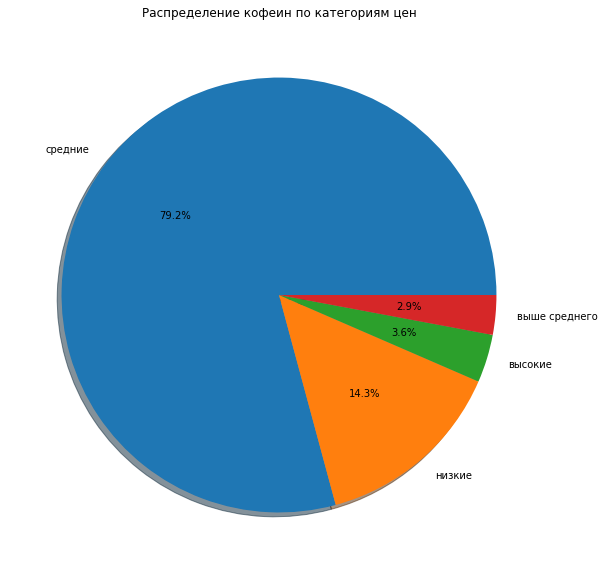

In [62]:
#Строим график распределения кофеин по категориям цен
plt.figure(figsize=(15,10))
plt.pie(data_coffee_pricet['name'],
       labels=data_coffee_pricet['price'],
       autopct='%1.1f%%',
       shadow=True)
plt.title('Распределение кофеин по категориям цен')
plt.show()

Большинство заведений поддерживают среднюю ценовую политику.

In [63]:
#Смотрим распределение сетевых и не сетевых кофеен
data_coffee_chain = (data.query('category == "кофейня"').groupby('chain', as_index=False)['name'].agg('count')
                     .sort_values('name', ascending=False))
display(data_coffee_chain)

,chain,name
1,1,720
0,0,693


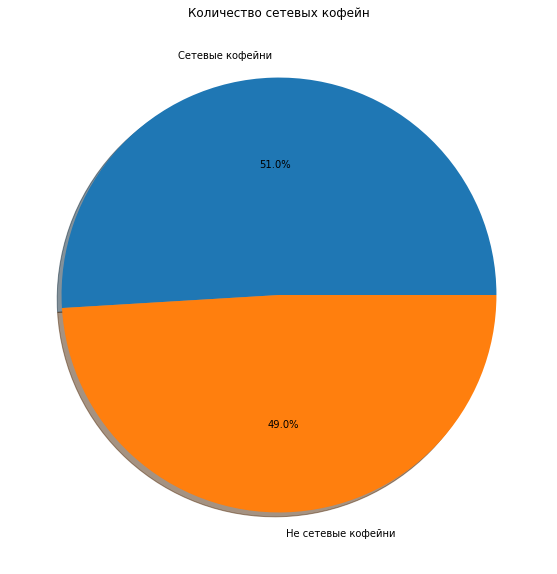

In [64]:
#Строим график распределения сетевых и не сетевых кофеин
labels_chain = ['Сетевые кофейни', 'Не сетевые кофейни']
plt.figure(figsize=(15,10))
plt.pie(data_coffee_chain['name'],
       labels=labels_chain,
       autopct='%1.1f%%',
       shadow=True)
plt.title('Количество сетевых кофейн')
plt.show()

Сетевых заведений немногим больше, чем не сетевых, это может означать что как сетевые так и не сетевые заведения пользуются своими преимуществами и могут конкурировать между собой.

Рекомендации:

    Выбрать для открытия кофейни Западный или Центральный административные округа как самые прибыльные по среднему чеку - 795 и 694 рубля за средний чек соответственно.
    
    Открыть не сетевую кофейню - создать уникальную и запоминающуюся атмосферу, создать уникальное меню, с дальнейшим рассмотрением возможности открыть целую сеть кофеен в различных округах.
   
    Выбрать среднюю ценовую политику на открытии кофейни, далее потребуется дальнейшее изучение поступающих данных для корректировки ценовой политики.
   
    Сделать круглосуточную и ежедневную кофейню.
    
    Изучить возможность доставки на дом, используя возможности больших компаний, например Яндекс.Доставка, Деливери Клаб и прочих компаний по доставке.

Отчёт по разделу:
    
    1) Кофейни занимают 3 место по количеству заведений, конкуренция будет немногим ниже, но всё еще ощутимой
    
    2) Видмм что сетевых и не сетевых заведений много, разница небольшая, можно будет далее изучить отдельно сетевые и не сетевые заведения чтобы понять, какой тип заведения мы хотим открыть, но на мой взгляд стоит начать с не сетевого заведения с возможным расширением.
    
    3) По среднему чеку выделяются ЦАО и ЗАО, если мы хотим высокий средний чек, нужно изучить конкурентов более детально.
    
    4) Средняя ценовая категория самая массовая среди заведений.
    
    5) Самая высокая медианная цена кружки каппучино - 190 рублей, но ориентироваться на эту цену не стоит, стоит учитывать много ньюансов, например затраты на изготовление одной чашки каппучино, прибыль с неё, которая будет оптимальной для заведения и посетителей.

ссылка на презентацию: https://disk.yandex.ru/i/XmgG-sBjnMSQzQ

## Заключение

В проекте спринта "Как рассказать историю с помощью данных" мы выполнили следующие задачи:
    
    Изучили данный нам датасет.
    
    Выполнили предобработку данных: дубликатов нет, но исправили дубликаты названий заведений, пропуски в столбцах не трогали, добавили столбец с названием улиц и указали, какие заведения работают круглосуточно, а какие нет.
    
    Проанализировали данные: топ-3 по количеству заведений - кафе, рестораны и кофейни, в среднем больше всего посадочных мест в ресторанах, барах/пабах и кофейнях, почти 2/3 заведений составляют не сетевые заведения, топ-3 сетевых заведений по категорям не изменились, всё так же лидируют кафе, ресторан и кофейни, с большим отрывом по общему количеству заведений лидирует Центральный административный округ, он же дилирует в разрезе категорий заведений, топ 3 рейтинга по заведению составляют бар/паб, пиццерия и рестораны, больше всего заведений на проспекте Мира, изучили улицы на которых находятся 1 заведение, в основном они расположены в спальных районах, рядом с ними и так же с прогулочными местами - парками.
    
    Провели исследование по заказу инвестиционного фонда, всю информацию изложил в презентации.